In [7]:
pip install yfinance pandas statsmodels seaborn pmdarima

  Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
  Using cached scikit_learn-1.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
Using ca

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for NVIDIA
ticker_symbol = 'NVDA'

# Fetch the historical data
data = yf.download(ticker_symbol, start='2019-05-01', interval='1wk')  

data = data.drop('Volume', axis=1)
data = data.iloc[:-1]
data = data * 10

monthly_mean = data['Adj Close'].resample('ME').mean()
monthly_data = monthly_mean.to_frame()

# Show the first few rows of the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close
Date                                                             
2019-04-29  45.777502  46.217499  44.778752  45.752501  45.441785
2019-05-06  43.874998  45.085001  40.999999  42.205000  41.918354
2019-05-13  40.875001  41.107502  38.735001  39.132500  38.866732
2019-05-20  38.137500  38.924999  36.220000  36.287501  36.041052
2019-05-27  36.287501  36.795001  33.847499  33.864999  33.634999


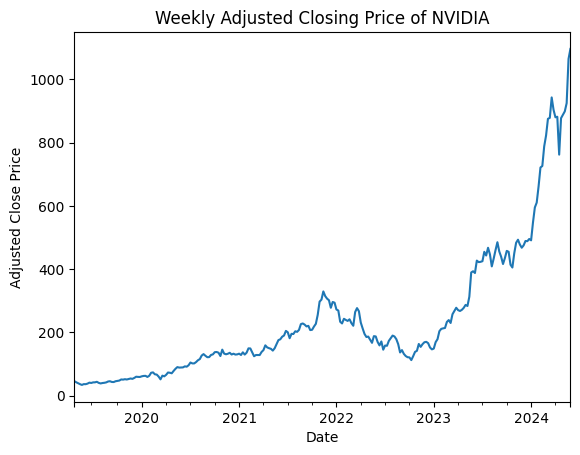

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the closing prices
data['Adj Close'].plot(title='Weekly Adjusted Closing Price of NVIDIA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()
plt.savefig('nvidia_price.png')

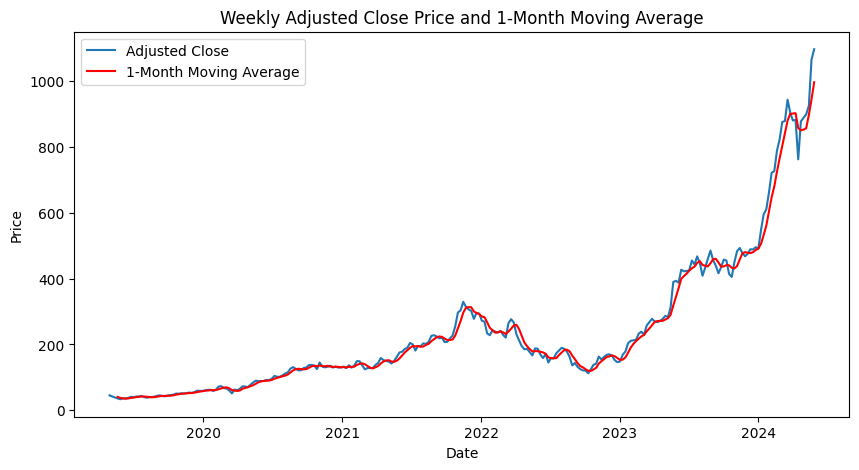

<Figure size 640x480 with 0 Axes>

In [10]:
# Calculate the monthly moving average
data['MA_6'] = data['Adj Close'].rolling(window=4).mean()

# Plotting the moving average along with the adjusted close price
plt.figure(figsize=(10, 5))
plt.plot(data['Adj Close'], label='Adjusted Close')
plt.plot(data['MA_6'], label='1-Month Moving Average', color='red')
plt.title('Weekly Adjusted Close Price and 1-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.savefig('graphs/nvidia_price_with_moving_average.png')


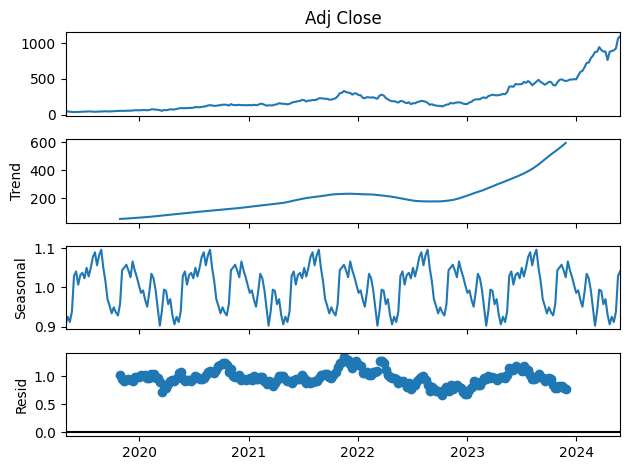

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition of the adjusted close price
result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=52)
result.plot()
plt.savefig('graphs/seasonal_decomposition')
plt.show()

In [12]:
# Resample to get quarterly averages
quarterly_data = data['Adj Close'].resample('QE').mean()

# Prepare data for the heatmap
quarterly_data.index = pd.to_datetime(quarterly_data.index)  # Ensure index is datetime
heatmap_data = quarterly_data.groupby([quarterly_data.index.year, quarterly_data.index.quarter]).mean()
heatmap_data = heatmap_data.unstack(level=-1)  # Unstack to get quarters as columns
heatmap_data.columns = ['Q1', 'Q2', 'Q3', 'Q4']  # Rename columns to quarters

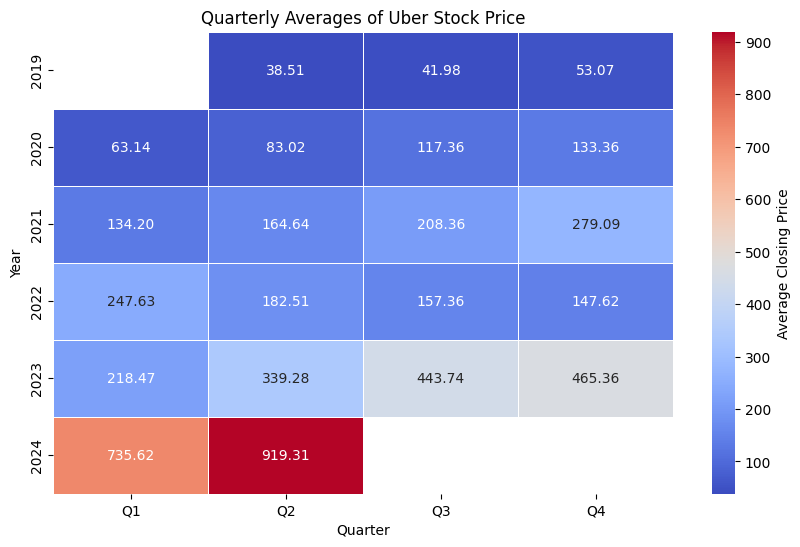

<Figure size 640x480 with 0 Axes>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', cbar_kws={'label': 'Average Closing Price'})

# Add titles and labels
plt.title('Quarterly Averages of Uber Stock Price')
plt.xlabel('Quarter')
plt.ylabel('Year')

# Show the plot
plt.show()
plt.savefig('graphs/heatmap')

<Figure size 3000x1200 with 0 Axes>

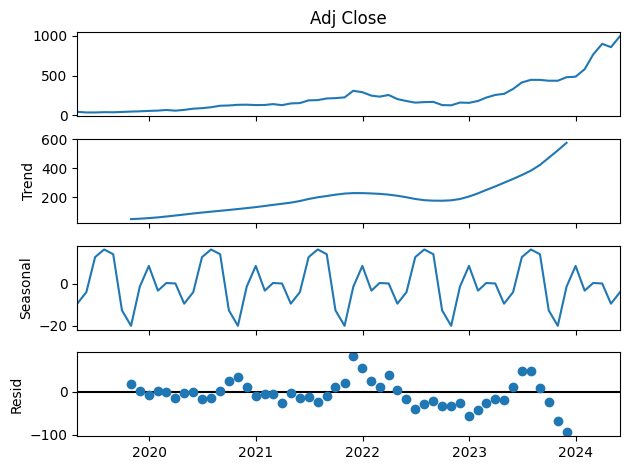

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

plt.figure(figsize=(30,12))
decomposed_series = sd(monthly_data['Adj Close'])
decomposed_series.plot()
plt.show()

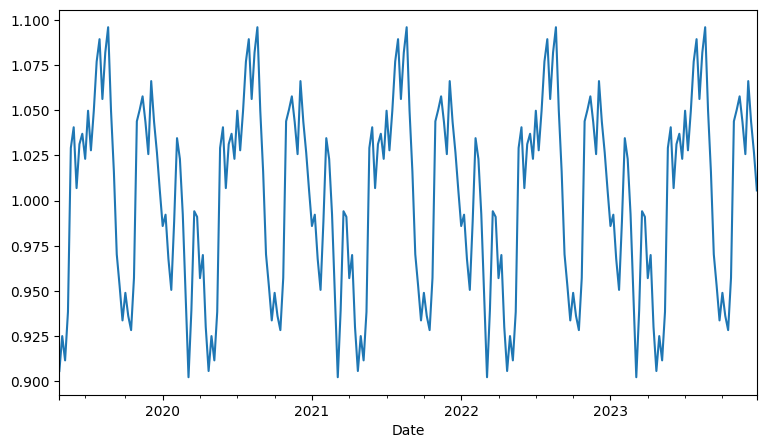

In [15]:
##Drilling Down and Observing Seasonality
fig = plt.figure(figsize=(9,5))
result.seasonal['2019':'2023'].plot()
plt.savefig('graphs/seasonal_trend')

Null Hypothesis : Time series is non-stationary

Alternate Hypothesis : Time series is stationary

Time Series is Stationary if we have constant mean, constant variance and No Trend and Seasonality.

In [16]:
from statsmodels.tsa.stattools import adfuller

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
   print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis- Time Series is Stationary')
  else:
    print('Failed to Reject Null Hypothesis- Time Series is Non-Stationary')

ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 2.248656
p-value: 0.998920
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Failed to Reject Null Hypothesis- Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition (Trend and Seasonality Present)

ACF measures the linear dependence between data points in a time series at different time lags. It calculates the correlation coefficient between a variable and its lagged version for various time lags. A high autocorrelation value indicates that the observations are closely related to their preceding observations.

ACF is used to identify the appropriate order of the moving average (MA) component in a time series model.

Text(0.5, 0, 'Lags')

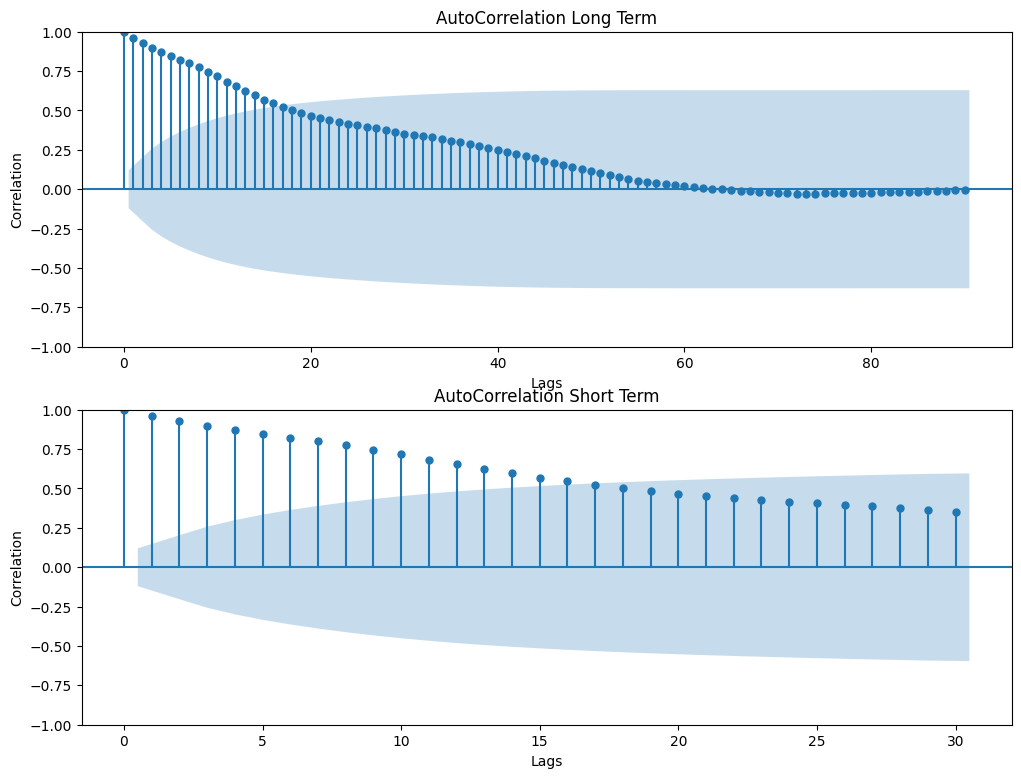

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
acf = plot_acf(data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

PACF measures the direct linear dependence between data points in a time series at a specific time lag, after removing the effect of any correlations at shorter lags. In other words, it calculates the correlation between a variable and its lagged version, while controlling for the influence of all intervening data points.

PACF is used to identify the appropriate order of the autoregressive (AR) component in a time series model.

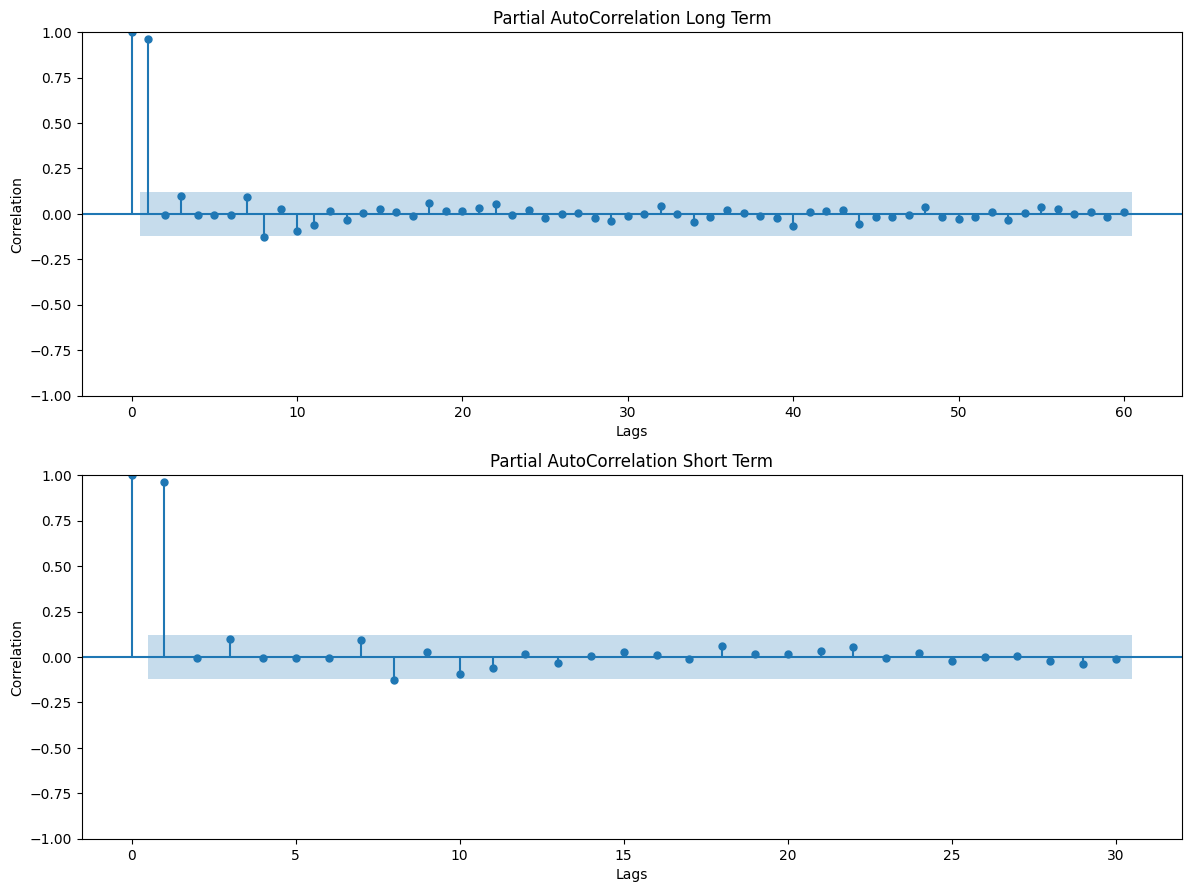

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
pacf = plot_pacf(data['Adj Close'],lags=60,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

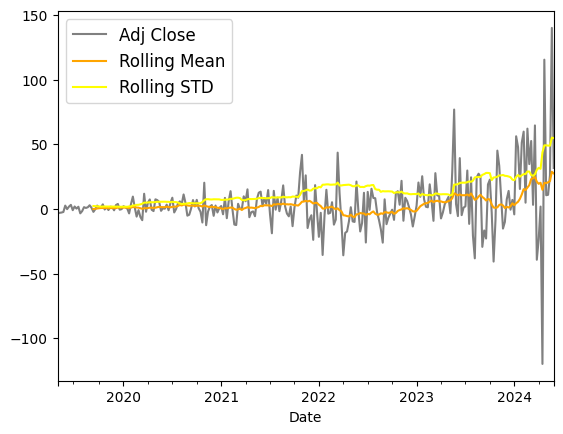

In [19]:
##Differencing By 1
data_diff = data['Adj Close'] - data['Adj Close'].shift(1)
data_diff[1:].plot(c='grey')
data_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [20]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(data_diff[1:])

ADF Statistic: -3.707048
p-value: 0.004015
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Null Hypothesis- Time Series is Stationary


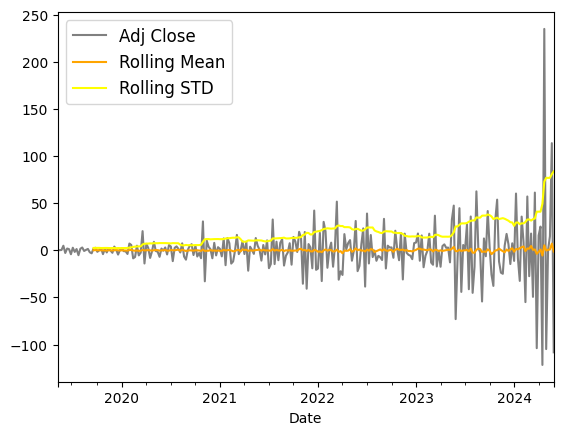

In [21]:
##Differencing By 2
data_diff_2 = data['Adj Close'] - (2*data['Adj Close'].shift(1)) + data['Adj Close'].shift(2)
data_diff_2[2:].plot(c='grey')
data_diff_2[2:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_diff_2[2:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [22]:
ad_fuller_func(data_diff_2[2:])

ADF Statistic: -7.706505
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject Null Hypothesis- Time Series is Stationary


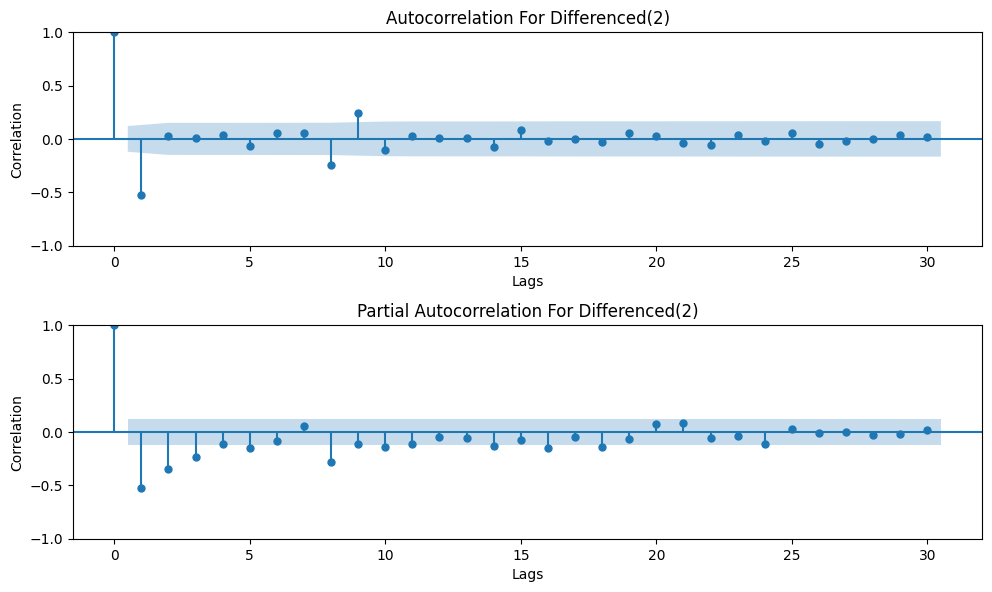

In [23]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,6))
acf = plot_acf(data_diff_2[2:],lags=30,ax=ax1)
pacf = plot_pacf(data_diff_2[2:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(2)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(2)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [24]:
modeling_series = data['Adj Close']

In [31]:
from pmdarima import auto_arima

# Run auto_arima to find the best SARIMA model
smodel = auto_arima(modeling_series,
                    seasonal=True,  # Enable seasonal differencing
                    m=78,           # Monthly data, assuming an annual seasonality
                    d=None,         # Let the model determine the differencing order
                    D=None,         # Seasonal differencing order
                    max_p=3, max_q=3,  # Maximum p and q
                    max_P=3, max_Q=3,  # Maximum seasonal P and Q
                    trace=True,      # Print status on the fits
                    error_action='ignore',  # Don't want to know if an order does not work
                    suppress_warnings=True,  # Suppress warnings
                    stepwise=True)  # Stepwise search to minimize AIC

# Print the summary of the model found
print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[78]             : AIC=inf, Time=83.34 sec
 ARIMA(0,2,0)(0,0,0)[78]             : AIC=2518.207, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[78]             : AIC=2429.838, Time=12.37 sec
 ARIMA(0,2,1)(0,0,1)[78]             : AIC=2355.533, Time=13.51 sec
 ARIMA(0,2,1)(0,0,0)[78]             : AIC=2353.643, Time=0.04 sec
 ARIMA(0,2,1)(1,0,0)[78]             : AIC=2355.526, Time=12.15 sec
 ARIMA(0,2,1)(1,0,1)[78]             : AIC=inf, Time=33.94 sec
 ARIMA(1,2,1)(0,0,0)[78]             : AIC=2355.638, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[78]             : AIC=2355.639, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[78]             : AIC=2429.176, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[78]             : AIC=2357.605, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[78] intercept   : AIC=2353.883, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[78]          
Total fit time: 155.757 seconds
                               SARIMAX Results                                

In [26]:
monthly_data = yf.download(ticker_symbol, start='2019-05-01', interval='1mo')  

[*********************100%%**********************]  1 of 1 completed


In [27]:
# Run auto_arima to find the best SARIMA model
smodel_monthly = auto_arima(modeling_series,
                    seasonal=True,  # Enable seasonal differencing
                    m=12,           # Monthly data, assuming an annual seasonality
                    d=None,         # Let the model determine the differencing order
                    D=None,         # Seasonal differencing order
                    max_p=3, max_q=3,  # Maximum p and q
                    max_P=3, max_Q=3,  # Maximum seasonal P and Q
                    trace=True,      # Print status on the fits
                    error_action='ignore',  # Don't want to know if an order does not work
                    suppress_warnings=True,  # Suppress warnings
                    stepwise=True)  # Stepwise search to minimize AIC

# Print the summary of the model found
print(smodel_monthly.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=4.44 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2518.207, Time=0.10 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2430.835, Time=0.29 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2355.249, Time=0.31 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=2353.643, Time=0.18 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=2355.287, Time=0.31 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=2356.390, Time=0.61 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=2355.638, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=2355.639, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=2429.176, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=2357.605, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=2353.883, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 6.735 seconds
                               SARIMAX Results                                
D

In [28]:
# Number of periods (weeks) to forecast
n_periods = 12

# Make forecast
forecast, conf_int = smodel.predict(n_periods=n_periods, return_conf_int=True)

print("Forecasted Data:\n", forecast)
print(len(forecast))

Forecasted Data:
 2024-06-03    1112.760439
2024-06-10    1140.693097
2024-06-17    1157.313211
2024-06-24    1175.411212
2024-07-01    1193.786313
2024-07-08    1219.255809
2024-07-15    1234.138879
2024-07-22    1258.261338
2024-07-29    1270.809560
2024-08-05    1278.854845
2024-08-12    1302.984989
2024-08-19    1327.820732
Freq: W-MON, dtype: float64
12


In [29]:
# Get the last date from the data
last_date = modeling_series.index[-1]

# Create a date range for the forecast period
future_dates = pd.date_range(start=last_date, periods=n_periods, freq='W')

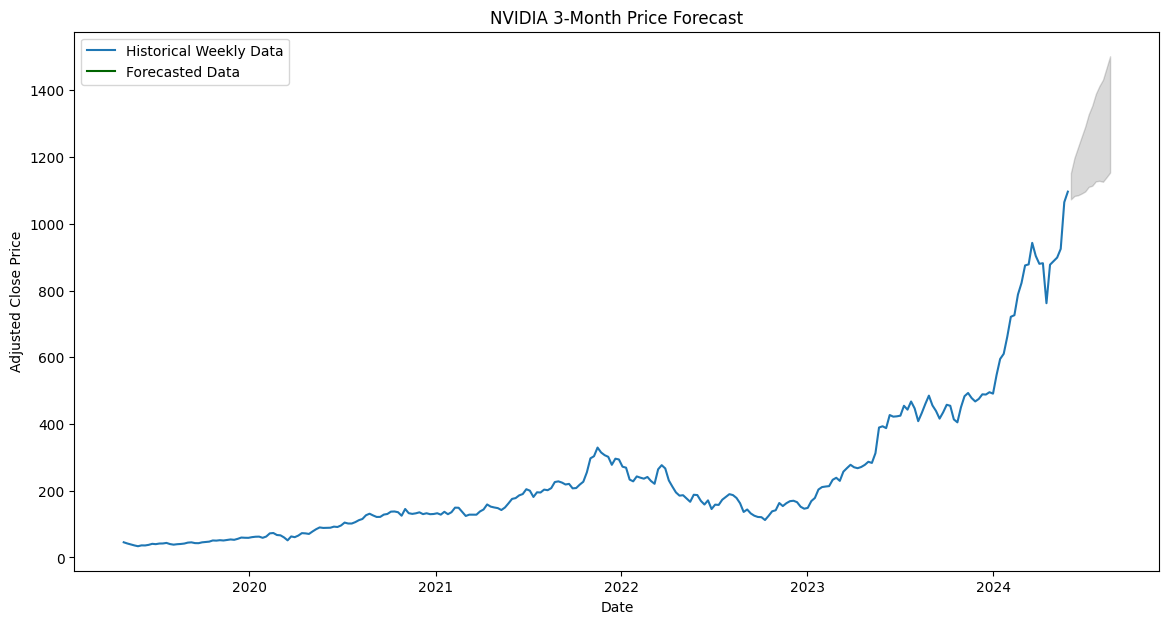

In [30]:
import matplotlib.pyplot as plt

# Convert the forecast array into a pandas Series
forecast_series = pd.Series(forecast, index=future_dates)

# Confidence intervals
lower_series = pd.Series(conf_int[:, 0], index=future_dates)
upper_series = pd.Series(conf_int[:, 1], index=future_dates)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(modeling_series, label='Historical Weekly Data')

# Plot the forecast
plt.plot(forecast_series, color='darkgreen', label='Forecasted Data')

# Plot the confidence intervals
plt.fill_between(future_dates, lower_series, upper_series, color='k', alpha=.15)

# Title and labels
plt.title('NVIDIA 3-Month Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()